# **download data**



In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "00"  # username from the json file
os.environ['KAGGLE_KEY'] = "c30180e65b45212ab6c1fe4688732366"  # key from the json file
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign # api copied from kaggle

 93% 303M/325M [00:03<00:00, 95.3MB/s]
100% 325M/325M [00:03<00:00, 103MB/s] 


# unzip data

In [2]:
! unzip skin-cancer-malignant-vs-benign.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  inflating: data/train/benign/448.jpg  
  infla


# **load picture and file**

In [3]:
#import libarary
import numpy as np
import random
import cv2
np.random.seed(42) #So that the result is constant
target_labels = ["benign" , "malignant"] #It is required to open the data
TARGET_HIGHET, TARGET_WIDTH = 100,100    #Scaling all images between 100,100
def load_images(base_base):
  filenames = []
  labels = []
  x_list = []
  for folder_name in os.listdir(base_base):
    folder_path = os.path.join(base_base, folder_name)
    if folder_name not in target_labels:
      continue 
    idx = target_labels.index(folder_name)
    for image_name in os.listdir(folder_path):
      image_path = os.path.join(folder_path, image_name)
      filenames.append(image_path)
      labels.append(idx)
  data = list(zip(filenames, labels))
  random.shuffle(data)
  filenames, labels = zip(*data)
  for file_name in filenames:
    gray_image = cv2.imread(file_name ) 
    resized_image = cv2.resize(gray_image, (TARGET_HIGHET, TARGET_WIDTH ))
    scaled_image = resized_image.astype("float32")/255.0
    x_list.append(scaled_image)

  x_data_array = np.array(x_list, dtype=np.float32)
  x_data_array = x_data_array.reshape(len(x_list) , TARGET_HIGHET, TARGET_WIDTH,3)
  y_array = np.array(labels , dtype= np.uint8)
  return x_data_array , y_array

# **Call Fenction load_images**

In [4]:
def load_data():
  TRAIN_DIR = "/content/data/train"
  TEST_DIR = "/content/data/test"
  (x_train, y_train) = load_images(TRAIN_DIR)
  (x_test, y_test) = load_images(TEST_DIR)
  return (x_train, y_train) , (x_test, y_test)

In [5]:
# Import packages and set numpy random seed
import tensorflow as tf
import matplotlib.pyplot as plt

# Load pre-shuffled training and test datasets
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape , x_test.shape

((2637, 100, 100, 3), (660, 100, 100, 3))

# **visualize sample from the  data **

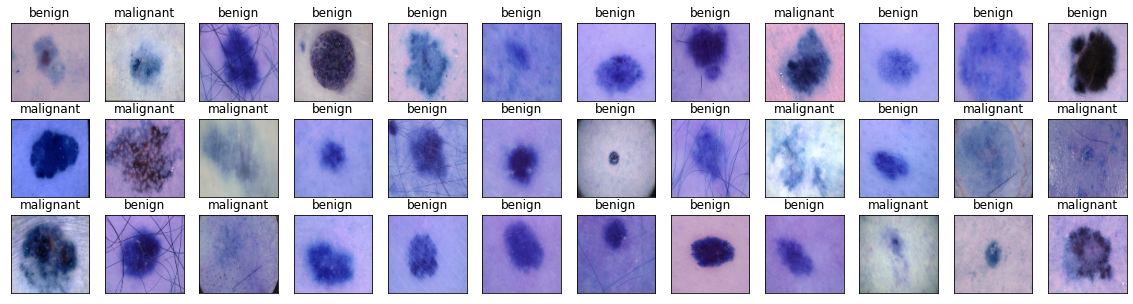

In [6]:
# Store labels of dataset
labels = ["benign" , "malignant"]

# Print the first several training images, along with the labels
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

# **construct base model**

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,LeakyReLU
from keras.applications import VGG16
model = Sequential()

model.add(VGG16(include_top=False, input_shape=(100, 100, 3,)))
model.add(Flatten())
model.add(Dense(32))
model.add(LeakyReLU(0.001))
model.add(Dense(16))
model.add(LeakyReLU(0.001))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].trainable = False

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()


58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                147488    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
_________________________________________________________

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# **plot model**

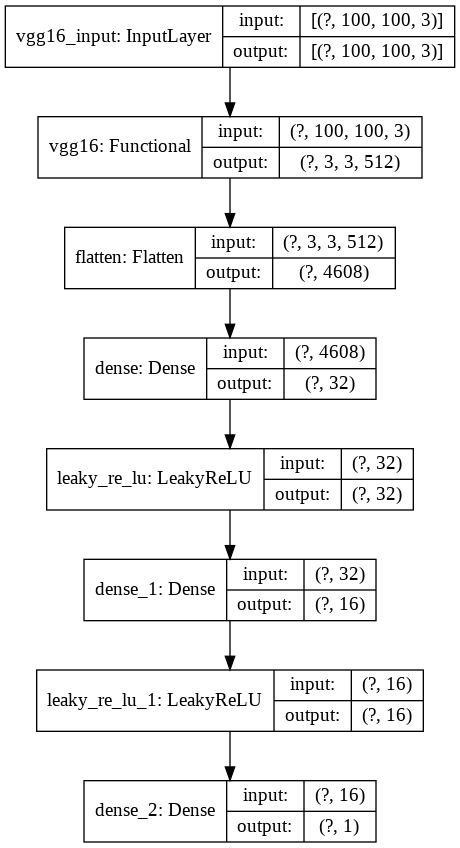

In [14]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

# **train model **

In [10]:
model.fit(x_train, y_train, epochs=20,verbose=2, batch_size=64,validation_split=0.2)

Epoch 1/20
33/33 - 247s - loss: 0.5067 - acc: 0.7430 - val_loss: 0.4515 - val_acc: 0.8049
Epoch 2/20
33/33 - 248s - loss: 0.4090 - acc: 0.8127 - val_loss: 0.4342 - val_acc: 0.8049
Epoch 3/20
33/33 - 248s - loss: 0.3508 - acc: 0.8402 - val_loss: 0.3954 - val_acc: 0.8314
Epoch 4/20
33/33 - 249s - loss: 0.3195 - acc: 0.8516 - val_loss: 0.3778 - val_acc: 0.8466
Epoch 5/20
33/33 - 248s - loss: 0.3054 - acc: 0.8611 - val_loss: 0.3738 - val_acc: 0.8333
Epoch 6/20
33/33 - 248s - loss: 0.2830 - acc: 0.8715 - val_loss: 0.3612 - val_acc: 0.8390
Epoch 7/20
33/33 - 246s - loss: 0.2663 - acc: 0.8805 - val_loss: 0.3642 - val_acc: 0.8352
Epoch 8/20
33/33 - 246s - loss: 0.2461 - acc: 0.8900 - val_loss: 0.4098 - val_acc: 0.8333
Epoch 9/20
33/33 - 244s - loss: 0.2364 - acc: 0.8957 - val_loss: 0.3839 - val_acc: 0.8277
Epoch 10/20
33/33 - 244s - loss: 0.2293 - acc: 0.8947 - val_loss: 0.3699 - val_acc: 0.8390
Epoch 11/20
33/33 - 244s - loss: 0.2121 - acc: 0.9056 - val_loss: 0.3820 - val_acc: 0.8390
Epoch 12

In [11]:
model.evaluate(x_test, y_test)

21/21 [==============================] - 60s 3s/step - loss: 0.4240 - acc: 0.8424


[0.4239616096019745, 0.842424213886261]

# **save model**

In [12]:
model.save("generated_model_keras.hdf5")